In [41]:
import pandas as pd
import numpy as np
import math
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score,make_scorer
from sklearn.metrics import roc_curve, roc_auc_score,plot_roc_curve
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

In [42]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [43]:
df = pd.read_excel('round4.xlsx')
df_complete = df[df['Completed'] > 0]
df_complete = df[df['School_Decision'] == "Admit"]
df_complete = df_complete[df_complete['School_Decision'] != "Administrative Withdrawal"]
df_complete = df_complete[df_complete['School_Decision'] != "Withdraw"]

In [44]:
df_complete['Race'].fillna("nan", inplace=True)
df_complete['Sex'].fillna("nan", inplace=True)
df_complete['Native Language'].fillna("nan", inplace=True)
df_complete['Citizenship'].fillna("nan", inplace=True)
df_complete['Have you ever failed a course?'].fillna("nan", inplace=True)
df_complete['GRE Verified'].fillna("No", inplace=True)
df_complete['School_Decision']=df_complete['School_Decision'].replace("Waitlist", "Deny")
df_complete['Overall_GPA'].fillna(0, inplace=True)
df_complete['student_Decision'].fillna("nan",inplace=True)
df_complete['student_Decision']=df_complete['student_Decision'].replace("nan", "Decline Offer")
df_complete['student_Decision']=df_complete['student_Decision'].replace("No Response", "Decline Offer")



In [45]:
df_complete['Race']=LabelEncoder().fit_transform(df_complete['Race'])
df_complete['Native Language']=LabelEncoder().fit_transform(df_complete['Native Language'])
df_complete['Citizenship']=LabelEncoder().fit_transform(df_complete['Citizenship'])
df_complete['GRE Verified']=LabelEncoder().fit_transform(df_complete['GRE Verified'])
df_complete['School_Decision']=LabelEncoder().fit_transform(df_complete['School_Decision'])
df_complete['Sex']=LabelEncoder().fit_transform(df_complete['Sex'])
df_complete['student_Decision']=LabelEncoder().fit_transform(df_complete['student_Decision'])

In [46]:
df_complete.head(10)

,Unnamed: 0,Ref,Sex,Citizenship,Native Language,Race,Have you ever failed a course?,Sub-Category,Birth Country,Tuition Percentage,year,Completed,School_Decision,student_Decision,final_Decision,Been_On_Waitinglist,Overall_GPA,GRE Verbal,GRE Verbal Percentile,GRE Quantitative,GRE Quantitative Percentile,GRE Analytical Writing,GRE Analytical Writing Percentile,GRE Verified,avg_score_round,Number_Recommender,Graduation_Year,Graduation_Country,Year_after_graduation,Just_after_graduation,job1_duration,job2_duration,job3_duration,max_job_duration,full-time_job_experience
1,1,723116564,0,0,11,4,0,Computational Methods,IN,40.0,2021,1,0,0,Accept Offer,0,3.560,157.0,75.0,168.0,92.0,3.5,38.0,1,5,3,2017.0,India,4.0,0.0,NaN,NaN,NaN,NaN,0
7,10,57943445,1,0,24,11,0,Statistical Methodology,BE,40.0,2020,1,0,2,Defer,0,2.920,163.0,93.0,166.0,89.0,4.5,81.0,1,5,3,2019.0,Belgium,1.0,1.0,396.0,943.0,NaN,31.0,0
8,11,57943445,1,0,24,11,0,Statistical Methodology,BE,40.0,2021,1,0,1,Decline Offer,0,2.920,163.0,93.0,166.0,89.0,4.5,81.0,1,0,0,2019.0,Belgium,2.0,0.0,396.0,943.0,NaN,31.0,1
11,18,960656601,1,2,7,2,0,Health and Biomedical Sciences,US,50.0,2019,1,0,2,Defer,0,3.130,155.0,68.0,155.0,59.0,4.0,59.0,1,4,3,2015.0,US,4.0,0.0,NaN,92.0,304.0,10.0,1
12,19,960656601,1,2,7,2,0,Health and Biomedical Sciences,US,50.0,2020,1,0,0,Accept Offer,0,3.130,155.0,68.0,155.0,59.0,4.0,59.0,1,0,0,2015.0,US,5.0,0.0,NaN,92.0,304.0,10.0,1
13,20,119431651,1,0,39,11,0,Statistical Methodology,NI,40.0,2020,1,0,1,No Response,0,3.752,144.0,22.0,159.0,70.0,3.5,39.0,1,5,3,2019.0,Nigeria,1.0,1.0,NaN,61.0,NaN,2.0,0
14,21,875963296,0,1,34,9,0,Statistical Methodology,GH,50.0,2019,1,0,1,No Response,0,0.000,NaN,NaN,NaN,NaN,NaN,NaN,0,3,3,NaN,NaN,NaN,NaN,NaN,457.0,120.0,15.0,0
18,26,102323454,1,2,7,9,1,Statistical Methodology,US,75.0,2016,1,0,0,Melt,0,3.470,NaN,NaN,NaN,NaN,NaN,NaN,0,4,3,2016.0,US,0.0,1.0,NaN,61.0,NaN,2.0,0
22,33,678906503,1,0,11,11,0,Statistical Methodology,IN,40.0,2018,1,0,0,Accept Offer,0,0.000,150.0,48.0,170.0,97.0,3.5,42.0,0,4,3,NaN,US,NaN,NaN,NaN,61.0,913.0,30.0,0
25,38,622481782,1,0,9,11,1,Statistical Methodology,IR,40.0,2021,1,0,0,Accept Offer,0,0.000,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,2020.0,Iran,1.0,1.0,1125.0,973.0,852.0,38.0,0


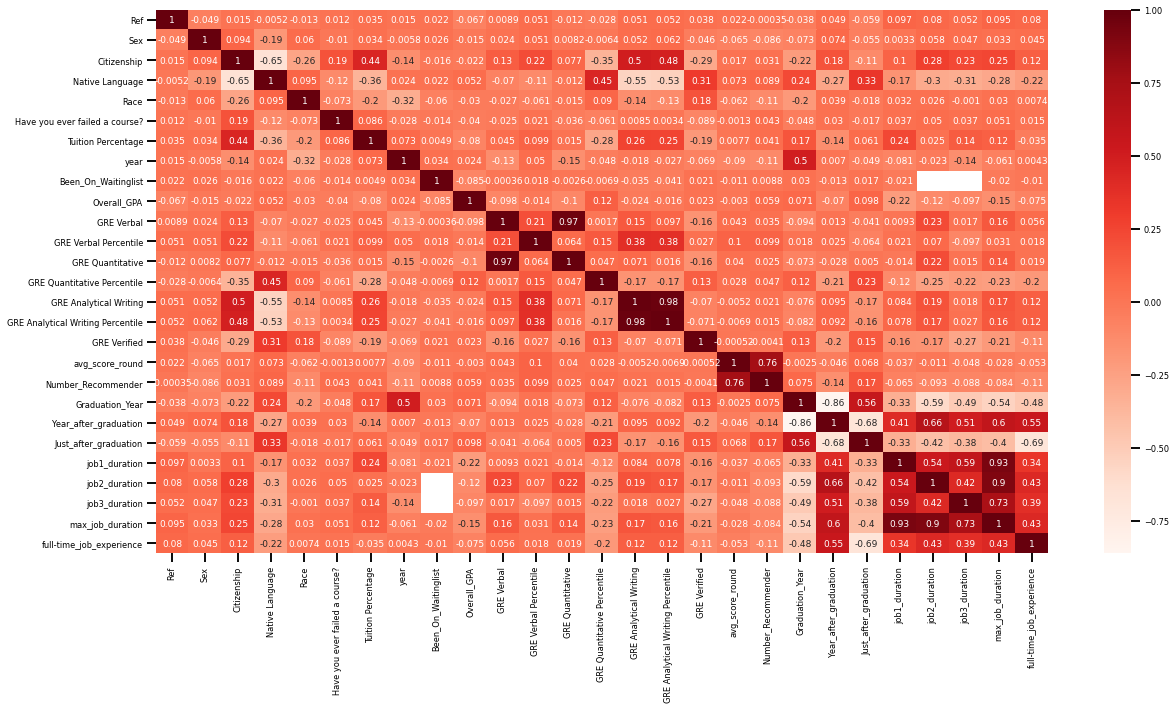

In [11]:
#Heatmap
df1=df_complete.copy()
df1=df1.drop(['student_Decision'], axis=1)
df1=df1.drop(['Completed'], axis=1)
df1=df1.drop(['School_Decision'], axis=1)
plt.figure(figsize = (20,10))
sns.set_context('talk', font_scale = 0.5)
sns.heatmap(df1.iloc[:,1:].corr(), cmap = 'Reds', annot = True)

In [71]:
#fill nan in GRE with median, mean and drop
m1 = df_complete.copy()
verbal_mean = m1['GRE Verbal'].mean()
writing_mean = m1['GRE Analytical Writing'].mean()
quant_mean = m1['GRE Quantitative'].mean()
m1['GRE Verbal'].fillna(verbal_mean, inplace=True)
m1['GRE Analytical Writing'].fillna(writing_mean, inplace=True)
m1['GRE Quantitative'].fillna(quant_mean, inplace=True)

m2 = df_complete.copy()
verbal_median = m2['GRE Verbal'].median()
writing_median = m2['GRE Analytical Writing'].median()
quant_median = m2['GRE Quantitative'].median()
m2['GRE Verbal'].fillna(verbal_median, inplace=True)
m2['GRE Analytical Writing'].fillna(writing_median, inplace=True)
m2['GRE Quantitative'].fillna(quant_median, inplace=True)

In [72]:
feature_cols = ['Race','Native Language','Citizenship','Have you ever failed a course?','Overall_GPA','GRE Verbal','GRE Quantitative']
x= m1[feature_cols]
y2 = m1['student_Decision']
x_train, x_test, y_train, y_test = train_test_split(x, y2 , test_size=0.2, random_state=1234)

In [67]:
feature_cols = ['Race','Native Language','Citizenship','Have you ever failed a course?','Overall_GPA','GRE Verbal','GRE Quantitative']
x= m2[feature_cols]
y2 = m2['student_Decision']
x_train, x_test, y_train, y_test = train_test_split(x, y2 , test_size=0.2, random_state=1234)

In [14]:
def get_feature_importance(clsf, ftrs):
    imp = clsf.feature_importances_.tolist()
    feat = ftrs
    result = pd.DataFrame({'feat':feat,'score':imp})
    result = result.sort_values(by=['score'],ascending=False)
    return result

In [73]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
pred = rf.predict(x_test)
print(accuracy_score(y_test, pred))
print(classification_report(y_test, pred))
# print("Roc_Auc_Score: ", roc_auc_score(y_test, pred))

0.6294642857142857
              precision    recall  f1-score   support

           0       0.53      0.37      0.43        71
           1       0.70      0.83      0.75       138
           2       0.09      0.07      0.08        15

    accuracy                           0.63       224
   macro avg       0.44      0.42      0.42       224
weighted avg       0.60      0.63      0.61       224



In [68]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
pred = rf.predict(x_test)
print(accuracy_score(y_test, pred))
print(classification_report(y_test, pred))
# print("Roc_Auc_Score: ", roc_auc_score(y_test, pred))
# get_feature_importance(rf, predictors)

0.5982142857142857
              precision    recall  f1-score   support

           0       0.45      0.32      0.38        71
           1       0.67      0.80      0.73       138
           2       0.10      0.07      0.08        15

    accuracy                           0.60       224
   macro avg       0.41      0.40      0.40       224
weighted avg       0.57      0.60      0.58       224



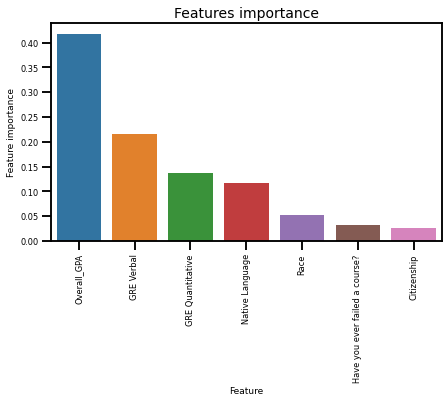

In [69]:
tmp = pd.DataFrame({'Feature': feature_cols, 'Feature importance': rf.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()  

[[ 23  44   4]
 [ 23 110   5]
 [  5   9   1]]


In [74]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y2, test_size = 0.2, random_state = 1234)
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, Y_train)

Y_pred = knn.predict(X_test)
s2 = accuracy_score(Y_test, Y_pred)
# s3 = precision_score(Y_test, Y_pred)
# s4 = recall_score(Y_test, Y_pred)
# s5 = f1_score(Y_test, Y_pred)
print("Accuracy score: ", s2)
# print("Precision score: ", s3)
# print("Recall score: ", s4)
# print("F1 score: ", s5)
print(classification_report(Y_test, Y_pred))
# print("Roc_Auc_Score: ", roc_auc_score(Y_test, Y_pred))

Accuracy score:  0.6205357142857143
              precision    recall  f1-score   support

           0       0.45      0.32      0.38        71
           1       0.67      0.83      0.74       138
           2       0.67      0.13      0.22        15

    accuracy                           0.62       224
   macro avg       0.60      0.43      0.45       224
weighted avg       0.60      0.62      0.59       224



In [60]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y2, test_size = 0.2, random_state = 1234)
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, Y_train)

Y_pred = knn.predict(X_test)
s2 = accuracy_score(Y_test, Y_pred)
# s3 = precision_score(Y_test, Y_pred)
# s4 = recall_score(Y_test, Y_pred)
# s5 = f1_score(Y_test, Y_pred)
print("Accuracy score: ", s2)
# print("Precision score: ", s3)
# print("Recall score: ", s4)
# print("F1 score: ", s5)
print(classification_report(Y_test, Y_pred))
# print("Roc_Auc_Score: ", roc_auc_score(Y_test, Y_pred))

Accuracy score:  0.6071428571428571
              precision    recall  f1-score   support

           0       0.42      0.35      0.38        71
           1       0.67      0.80      0.73       138
           2       0.00      0.00      0.00        15

    accuracy                           0.61       224
   macro avg       0.37      0.39      0.37       224
weighted avg       0.55      0.61      0.57       224



C:\Users\admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Decision Tree  using GridSearchCV to find optimal parameters
param_grid = {'max_depth': np.arange(3, 10),
             'criterion' : ['gini','entropy'],
             'max_leaf_nodes': [5,10,20,100],
             'min_samples_split': [2, 5, 10, 20]}

# create the grid
grid_tree = GridSearchCV(DecisionTreeClassifier(), param_grid, cv = 5, scoring= 'accuracy')

#training
grid_tree.fit(X_train, Y_train)
#print best parameters
print(grid_tree.best_estimator_)
#with its score
print(np.abs(grid_tree.best_score_))

In [75]:
# use best parameters
dt = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=20,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=20,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
dt.fit(X_train, Y_train)
Y_pred = dt.predict(X_test)
s2 = accuracy_score(Y_test,Y_pred)
# s5=f1_score(Y_test, Y_pred)
print("Accuracy score: ", s2)
# print("F1 score: ", s5)
print(classification_report(Y_test, Y_pred))


Accuracy score:  0.6875
              precision    recall  f1-score   support

           0       0.58      0.45      0.51        71
           1       0.72      0.88      0.79       138
           2       0.00      0.00      0.00        15

    accuracy                           0.69       224
   macro avg       0.43      0.44      0.43       224
weighted avg       0.63      0.69      0.65       224



C:\Users\admin\anaconda3\lib\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
C:\Users\admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [76]:
matrix = metrics.confusion_matrix(y_test, pred)
print(matrix)

[[ 26  40   5]
 [ 19 114   5]
 [  4  10   1]]


In [62]:
# use best parameters
dt = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=20,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=20,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
dt.fit(X_train, Y_train)
Y_pred = dt.predict(X_test)
s2 = accuracy_score(Y_test,Y_pred)
# s5=f1_score(Y_test, Y_pred)
print("Accuracy score: ", s2)
# print("F1 score: ", s5)
print(classification_report(Y_test, Y_pred))


Accuracy score:  0.6741071428571429
              precision    recall  f1-score   support

           0       0.56      0.41      0.47        71
           1       0.72      0.88      0.79       138
           2       0.00      0.00      0.00        15

    accuracy                           0.67       224
   macro avg       0.43      0.43      0.42       224
weighted avg       0.62      0.67      0.64       224



C:\Users\admin\anaconda3\lib\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "


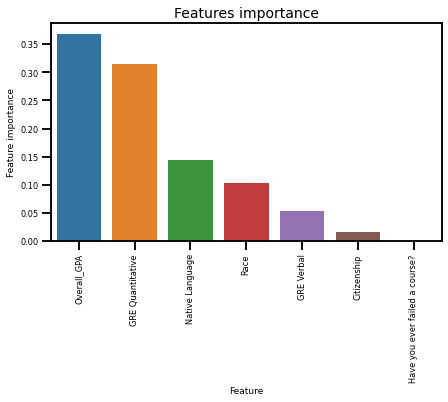

In [77]:
tmp = pd.DataFrame({'Feature': feature_cols, 'Feature importance': dt.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()  